In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import random

import math

from scipy.optimize import fsolve

import time

In [2]:
def M_right_func(t, point):
    x = point
    dxdt = - gm * x
    return dxdt

In [3]:
def RK4(f, t0, initital_point, h, T):
    time = t0
    u = u0
    results = [u]
    t = [time]
    
    while t[-1] < T:
        k1 = h * f(time, u)
        k2 = h * f(time + h/2, u + k1/2)
        k3 = h * f(time + h/2, u + k2/2)
        k4 = h * f(time + h, u + k3)
        
        u = u + (k1 + 2*k2 + 2*k3 + k4) / 6
        time = time + h
        
        results.append(u)
        t.append(time)
    
    return np.array(results), np.array(t)

In [4]:
def Bernoulli(x0, t0, T):
    time = t0
    x = x0
    results = [x]
    t = [time]
    while t[-1] < T:
        r = random.uniform(0, 1)
        k1 = gm * x
        if(r < k1 * h):
            x = x - 1
        time = time + h
        
        results.append(x)
        t.append(time)
    
    return np.array(results), np.array(t)


def Gillespie(x0, t0, T):
    time = t0
    x = x0
    results = [x0]
    t = [time]
    while t[-1] < T:
        r = random.uniform(0, 1) 
        tau = np.log(1/r) / (gm * x)
        x = x - 1
        time = time + tau
        results.append(x)
        t.append(time)

    return np.array(results), np.array(t)

def Gillespie_new(u0, t0, T):
    time = t0
    u = u0
    results = [u]
    t = [time]
    while t[-1] < T:
        r = random.uniform(0, 1)
        a1 = a1_x(u[1])
        a2 = a2_m(u[0])
        a3 = a3_m(u[0])
        a4 = a4_x(u[1])
        a0 = a1 + a2 + a3 + a4
        
        tau = 1 / (a0) * np.log(1 / r)
        
        p1 = a1 / a0
        p2 = a2 / a0
        p3 = a3 / a0
        p4 = a4 / a0
        
        r2 = random.uniform(0, 1)
        
        choice_m1_l = 0
        choice_m1_r = p1
        
        choice_m2_l = p1
        choice_m2_r = p1 + p2
        
        choice_m3_l = p1 + p2
        choice_m3_r = p1 + p2 + p3
        
        choice_m4_l = p1 + p2 + p3
        choice_m4_r = 1
        
        c1 = [1, 0]
        c2 = [-1, 0]
        c3 = [0, 1]
        c4 = [0, -1]
        
        num_choice = 0
        if choice_m1_l <= r < choice_m1_r:
            u  = u + c1
        elif choice_m2_l <= r < choice_m2_r:
            u  = u + c2
        elif choice_m4_l <= r < choice_m3_r:
            u  = u + c3
        elif choice_m4_l <= r < choice_m4_r:
            u  = u + c4
    
        time = time + tau
        results.append(u)
        t.append(time)

    return np.array(results), np.array(t)

In [23]:
gm = 0.01
T = 1000

# Начальные условия
h = 0.01
t0 = 0
u0 = np.array([1e4])

# Решение системы методом Рунге-Кутта 4-го порядка
x_RK4, t_RK4 = RK4(M_right_func, t0, u0, h, T)

In [24]:
x0 = 1e4

# Засекаем время перед выполнением алгоритма
start_time = time.time()

x_Bernoulli, t_Bernoulli = Bernoulli(x0, t0, T)

# Засекаем время после выполнения алгоритма
end_time = time.time()

# Вычисляем время работы алгоритма
execution_time_Bernoulli = end_time - start_time

In [25]:
# Засекаем время перед выполнением алгоритма
start_time = time.time()

x_Gillespie, t_Gillespie  = Gillespie(x0, t0, T)

# Засекаем время после выполнения алгоритма
end_time = time.time()

# Вычисляем время работы алгоритма
execution_time_Gillespie = end_time - start_time

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_14896\1382229181.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  tau = np.log(1/r) / (gm * x)


In [26]:
print(execution_time_Bernoulli)
print(execution_time_Gillespie)

0.05599808692932129
0.013999223709106445


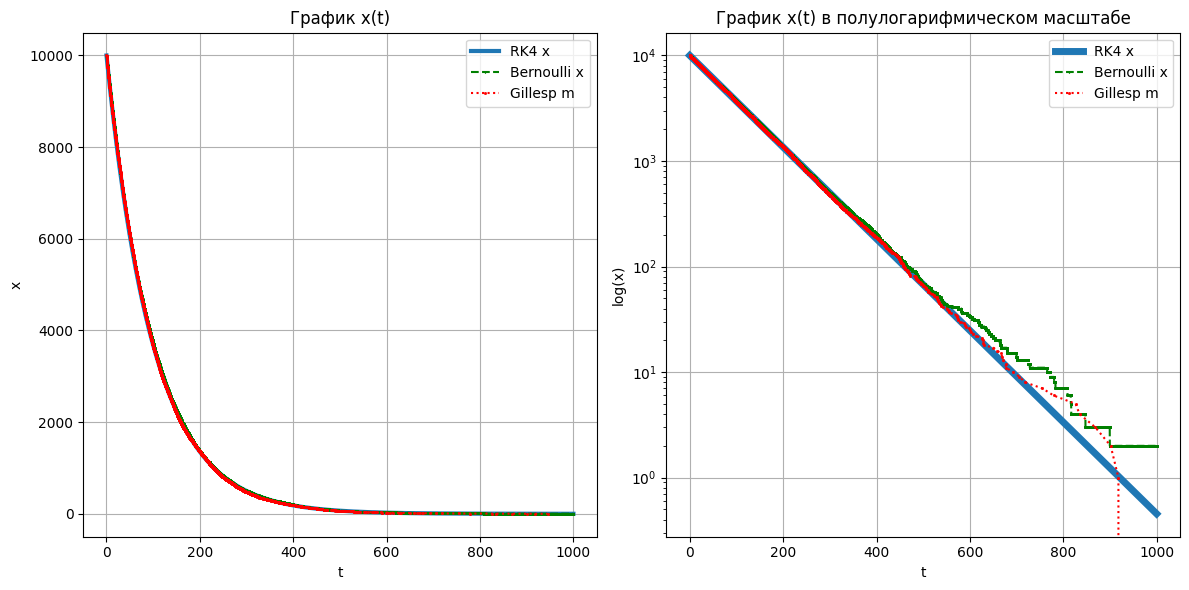

In [29]:
# Построение графиков
plt.figure(figsize=(12, 6))

# График x(t)
plt.subplot(1, 2, 1)
plt.plot(t_RK4, x_RK4, linewidth = 3, label='RK4 x')
plt.plot(t_Bernoulli, x_Bernoulli, marker='x', linestyle='--', color='g', markersize = 1, label='Bernoulli x')
plt.plot(t_Gillespie, x_Gillespie, marker='s', linestyle=':', color='r', markersize = 1, label='Gillesp m')
plt.title('График x(t)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.grid()

# График в полулогарифмическом масштабе
plt.subplot(1, 2, 2)
plt.semilogy(t_RK4, x_RK4, linewidth = 5, label='RK4 x')
plt.semilogy(t_Bernoulli, x_Bernoulli, marker='x', linestyle='--', color='g', markersize = 1, label='Bernoulli x')
plt.semilogy(t_Gillespie, x_Gillespie, marker='s', linestyle=':', color='r', markersize = 1, label='Gillesp m')
plt.title('График x(t) в полулогарифмическом масштабе')
plt.xlabel('t')
plt.ylabel('log(x)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [169]:
n = 6
alpha = 10
beta = 1
gm = 1

def function_autoregr(t, u):
    m, x = u
    dmdt = alpha / (1 + x ** n) - m
    dxdt = beta * m - gm * x
    return np.array([dmdt, dxdt])

In [170]:
def a1_x(x):
    return alpha / (1 + x ** n)

def a2_m(m):
    return alpha * m

def a3_m(m):
    return beta * m

def a4_x(x):
    return gm * x

In [171]:
# Начальные условия
h = 0.01
t0 = 0
u0 = np.array([30, 15])
solutionRK = []
timeRK = []

# Решение системы методом Рунге-Кутта 4-го порядка
solutionRK, timeRK = RK4(function_autoregr, t0, u0, h, T)

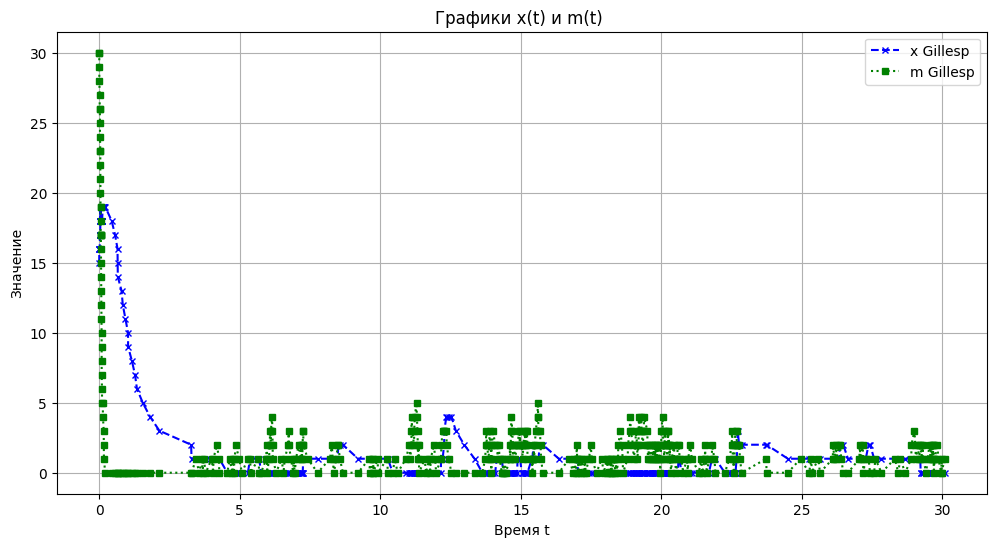

In [173]:
u0 = [30, 15]

def Gillesp(u0, t0, T):
    results = [u0]  # Создаем пустой список для хранения изменений вектора u
    time = [t0]  # Создаем пустой список для хранения времени
    u = u0.copy()
    t = t0
    while t < T:
        r1, r2 = np.random.rand(2)
        
        a1 = a1_x(u[1])
        a2 = a2_m(u[0])
        a3 = a3_m(u[0])
        a4 = a4_x(u[1])
        a0 = a1 + a2 + a3 + a4
        
        p1 = a1 / a0
        p2 = a2 / a0
        p3 = a3 / a0
        p4 = a4 / a0
        
        c1 = [1, 0]
        c2 = [-1, 0]
        c3 = [0, 1]
        c4 = [0, -1]
    
        # Выбор реакции
        if r1 < a1 / a0:
            u[0] += c1[0]
        elif r1 < (a1 + a2) / a0:
            u[0] += c2[0]
        elif r1 < (a1 + a2 + a3) / a0:
            u[1] += c3[1]
        else:
            u[1] += c4[1]
        
        tau = -np.log(r2) / a0
        t = t + tau
        time.append(t)
        results.append(u.copy())  # Добавляем копию измененного вектора u в список

    return np.array(results), np.array(time)

result, time_values = Gillesp(u0, t0, T)
m_values = [item[0] for item in result]
x_values = [item[1] for item in result]

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(time_values, x_values, marker='x', linestyle='--', color='b', markersize =4, label='x Gillesp')
plt.plot(time_values, m_values, marker='s', linestyle=':', color='g', markersize = 4, label='m Gillesp')
plt.xlabel('Время t')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.title('Графики x(t) и m(t) ')
plt.show()

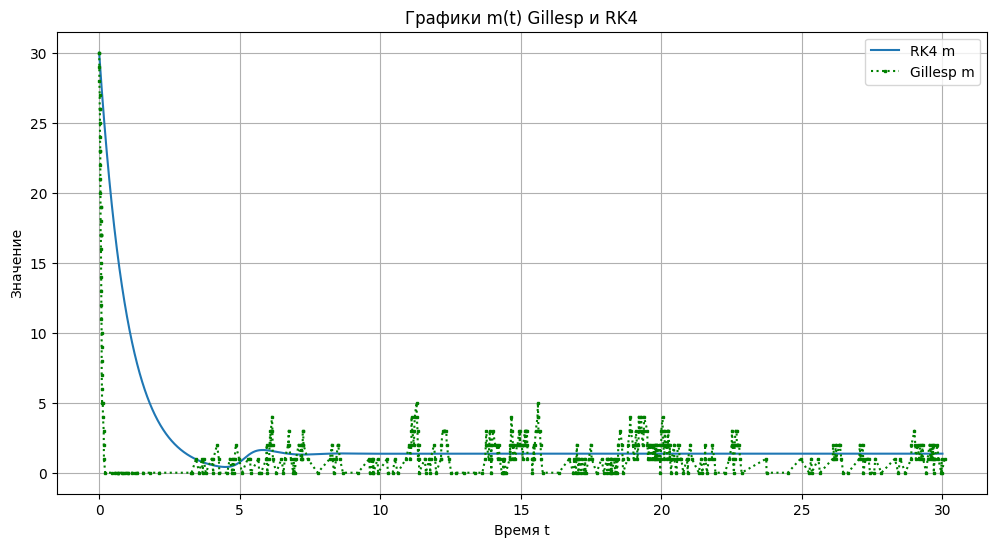

In [174]:
# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(timeRK, solutionRK[:, 0], label='RK4 m')
plt.plot(time_values, m_values, marker='s', linestyle=':', color='g', markersize = 2, label='Gillesp m')
plt.xlabel('Время t')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.title('Графики m(t) Gillesp и RK4')
plt.show()

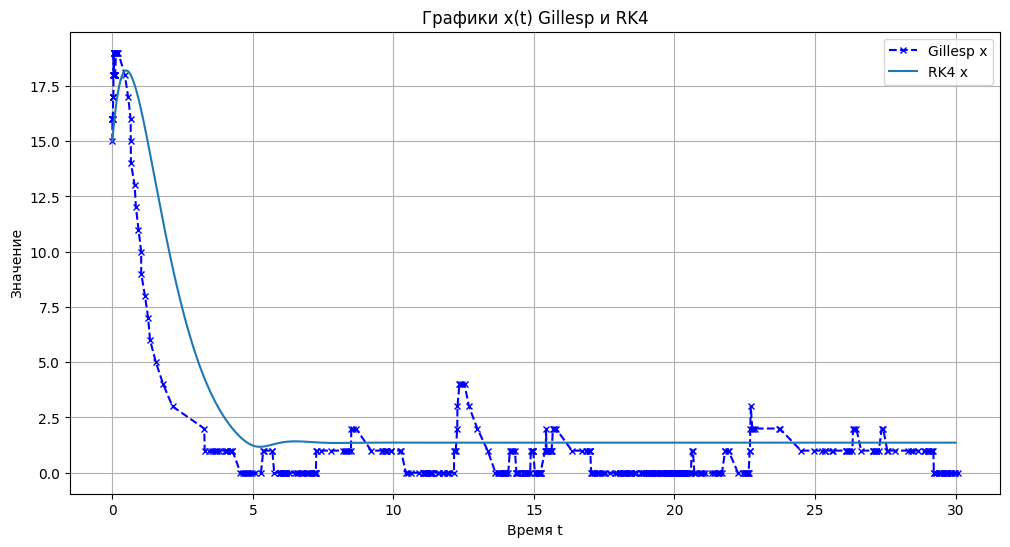

In [175]:
# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(time_values, x_values, marker='x', linestyle='--', color='b', markersize =4, label='Gillesp x')
plt.plot(timeRK, solutionRK[:, 1], label='RK4 x')
plt.xlabel('Время t')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.title('Графики x(t) Gillesp и RK4')
plt.show()

In [200]:
n = 6
alpha = 200
beta = 1
gm = 1
T = 50

In [201]:
timeRK = []
# Решение системы методом Рунге-Кутта 4-го порядка
solutionRK, timeRK = RK4(function_autoregr, t0, u0, h, T)

result, time_values = Gillesp(u0, t0, T)
m_values = [item[0] for item in result]
x_values = [item[1] for item in result]

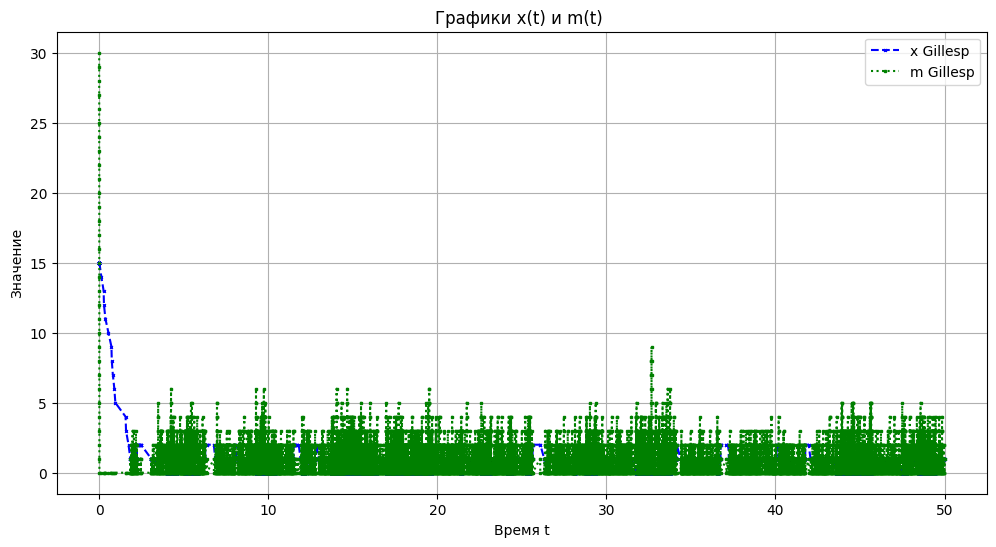

In [202]:
# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(time_values, x_values, marker='x', linestyle='--', color='b', markersize =2, label='x Gillesp')
plt.plot(time_values, m_values, marker='s', linestyle=':', color='g', markersize = 2, label='m Gillesp')
plt.xlabel('Время t')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.title('Графики x(t) и m(t) ')
plt.show()

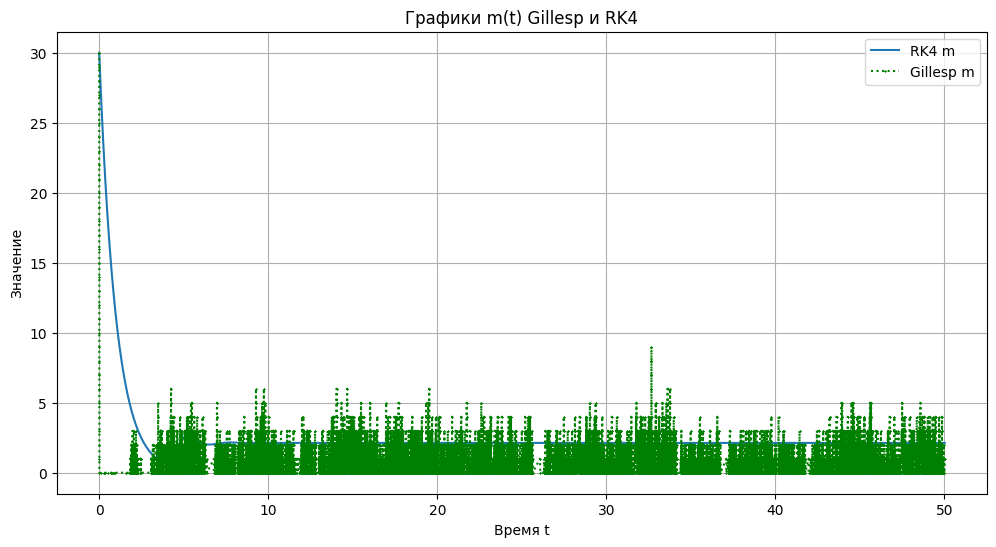

In [203]:
# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(timeRK, solutionRK[:, 0], label='RK4 m')
plt.plot(time_values, m_values, marker='x', linestyle=':', color='g', markersize = 1, label='Gillesp m')
plt.xlabel('Время t')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.title('Графики m(t) Gillesp и RK4')
plt.show()

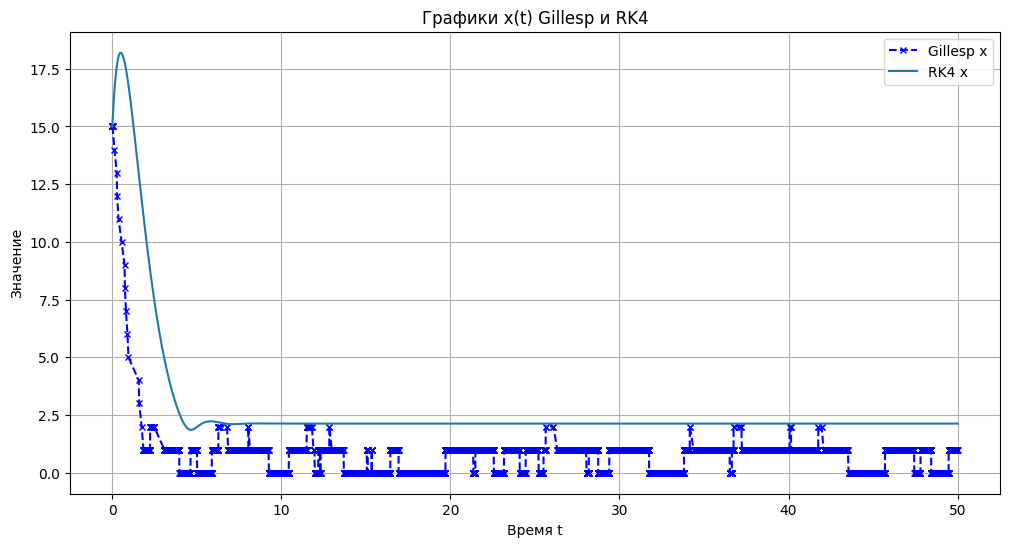

In [204]:
# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(time_values, x_values, marker='x', linestyle='--', color='b', markersize =4, label='Gillesp x')
plt.plot(timeRK, solutionRK[:, 1], label='RK4 x')
plt.xlabel('Время t')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.title('Графики x(t) Gillesp и RK4')
plt.show()